In [9]:
# Define libraries
import pandas as pd
import itertools
import csv
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

      Complete attribute documentation:
      
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     20 ekgmo (month of exercise ECG reading)
     21 ekgday(day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

In [10]:
dataCVD = pd.read_csv("combined_data.csv")

In [11]:
# select only the fields we are interested in

selected_fields = dataCVD[['Dataset','2','3','4','8','9','11','12','13','14','15','16','17',
                        '27','28','29','30','31','32',
                        '37','38','39','40','41','57']]

In [12]:
# rename the columns names to be more meaningful

selected_fields.columns = ['dataset', 'age2', 'sex3', 'painloc4','cp8','trestbps9',
    'chol11','smoke12','cigs13','years14','fbs15','dm16','famhist17',
     'proto27','thaldur28','thaltime29','met30','thalach31','thalrest32',
    'trestbpd36','exang37','xhypo38','oldpeak39','slope40','num57']

In [ ]:
# Define a condition, so that the target variable has only 0 = No Disease, 1 = Heart Disease
# Replacing 2,3,4 stages with 1, which implies Heart disease condition is true
# Target: Heart disease (0 = no, 1 = yes)
# Define condition
condition = (selected_fields['num57'] > 1)

# replacement value
replace_with = 1

# Replace now
selected_fields.loc[condition, 'num57'] = 1

In [6]:
# print all the unique values in each feature

for i in selected_fields.columns:
    print(i, len(selected_fields[i].unique()))

dataset 4
age2 50
sex3 2
painloc4 3
cp8 4
trestbps9 61
chol11 214
smoke12 3
cigs13 26
years14 43
fbs15 3
dm16 3
famhist17 3
proto27 15
thaldur28 87
thaltime29 65
met30 35
thalach31 120
thalrest32 76
trestbpd36 3
exang37 3
xhypo38 53
oldpeak39 5
slope40 32
num57 5


In [7]:
selected_fields.describe()

,age2,sex3,painloc4,cp8,trestbps9,chol11,smoke12,cigs13,years14,fbs15,...,thaltime29,met30,thalach31,thalrest32,trestbpd36,exang37,xhypo38,oldpeak39,slope40,num57
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,...,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,53.480534,0.790879,-2.191324,3.253615,122.840934,191.826474,-6.565072,5.982202,5.439377,-0.750834,...,-1.712013,13.506785,128.348165,70.224694,-0.183537,-0.556174,0.189766,-1.922136,3.337041,1.129032
std,9.435894,0.406908,4.611051,0.928499,39.558930,116.116297,4.162745,19.370716,18.219811,2.775607,...,7.868678,30.054989,43.169759,24.915818,2.301040,2.224062,2.711020,5.137156,12.399659,1.259720
min,28.000000,0.000000,-9.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,47.000000,1.000000,-9.000000,3.000000,120.000000,162.000000,-9.000000,-9.000000,-9.000000,0.000000,...,-9.000000,5.000000,115.000000,63.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000
50%,54.000000,1.000000,1.000000,4.000000,130.000000,222.000000,-9.000000,0.000000,0.000000,0.000000,...,-9.000000,7.000000,137.000000,73.000000,0.000000,0.000000,0.200000,1.000000,6.000000,1.000000
75%,60.000000,1.000000,1.000000,4.000000,140.000000,267.000000,0.000000,20.000000,20.000000,0.000000,...,6.000000,10.000000,155.000000,84.000000,1.000000,0.000000,1.500000,2.000000,14.000000,2.000000
max,77.000000,1.000000,1.000000,4.000000,200.000000,603.000000,1.000000,99.000000,60.000000,1.000000,...,20.000000,200.000000,202.000000,139.000000,1.000000,1.000000,6.200000,3.000000,36.000000,4.000000


In [13]:
# check for null values in all the fields
dataCVD.isnull().sum()

Dataset    0
0          0
1          0
2          0
3          0
          ..
71         0
72         0
73         0
74         0
75         0
Length: 77, dtype: int64

Correlation Matrix

<ipython-input-8-bc75777033ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = selected_fields.corr()


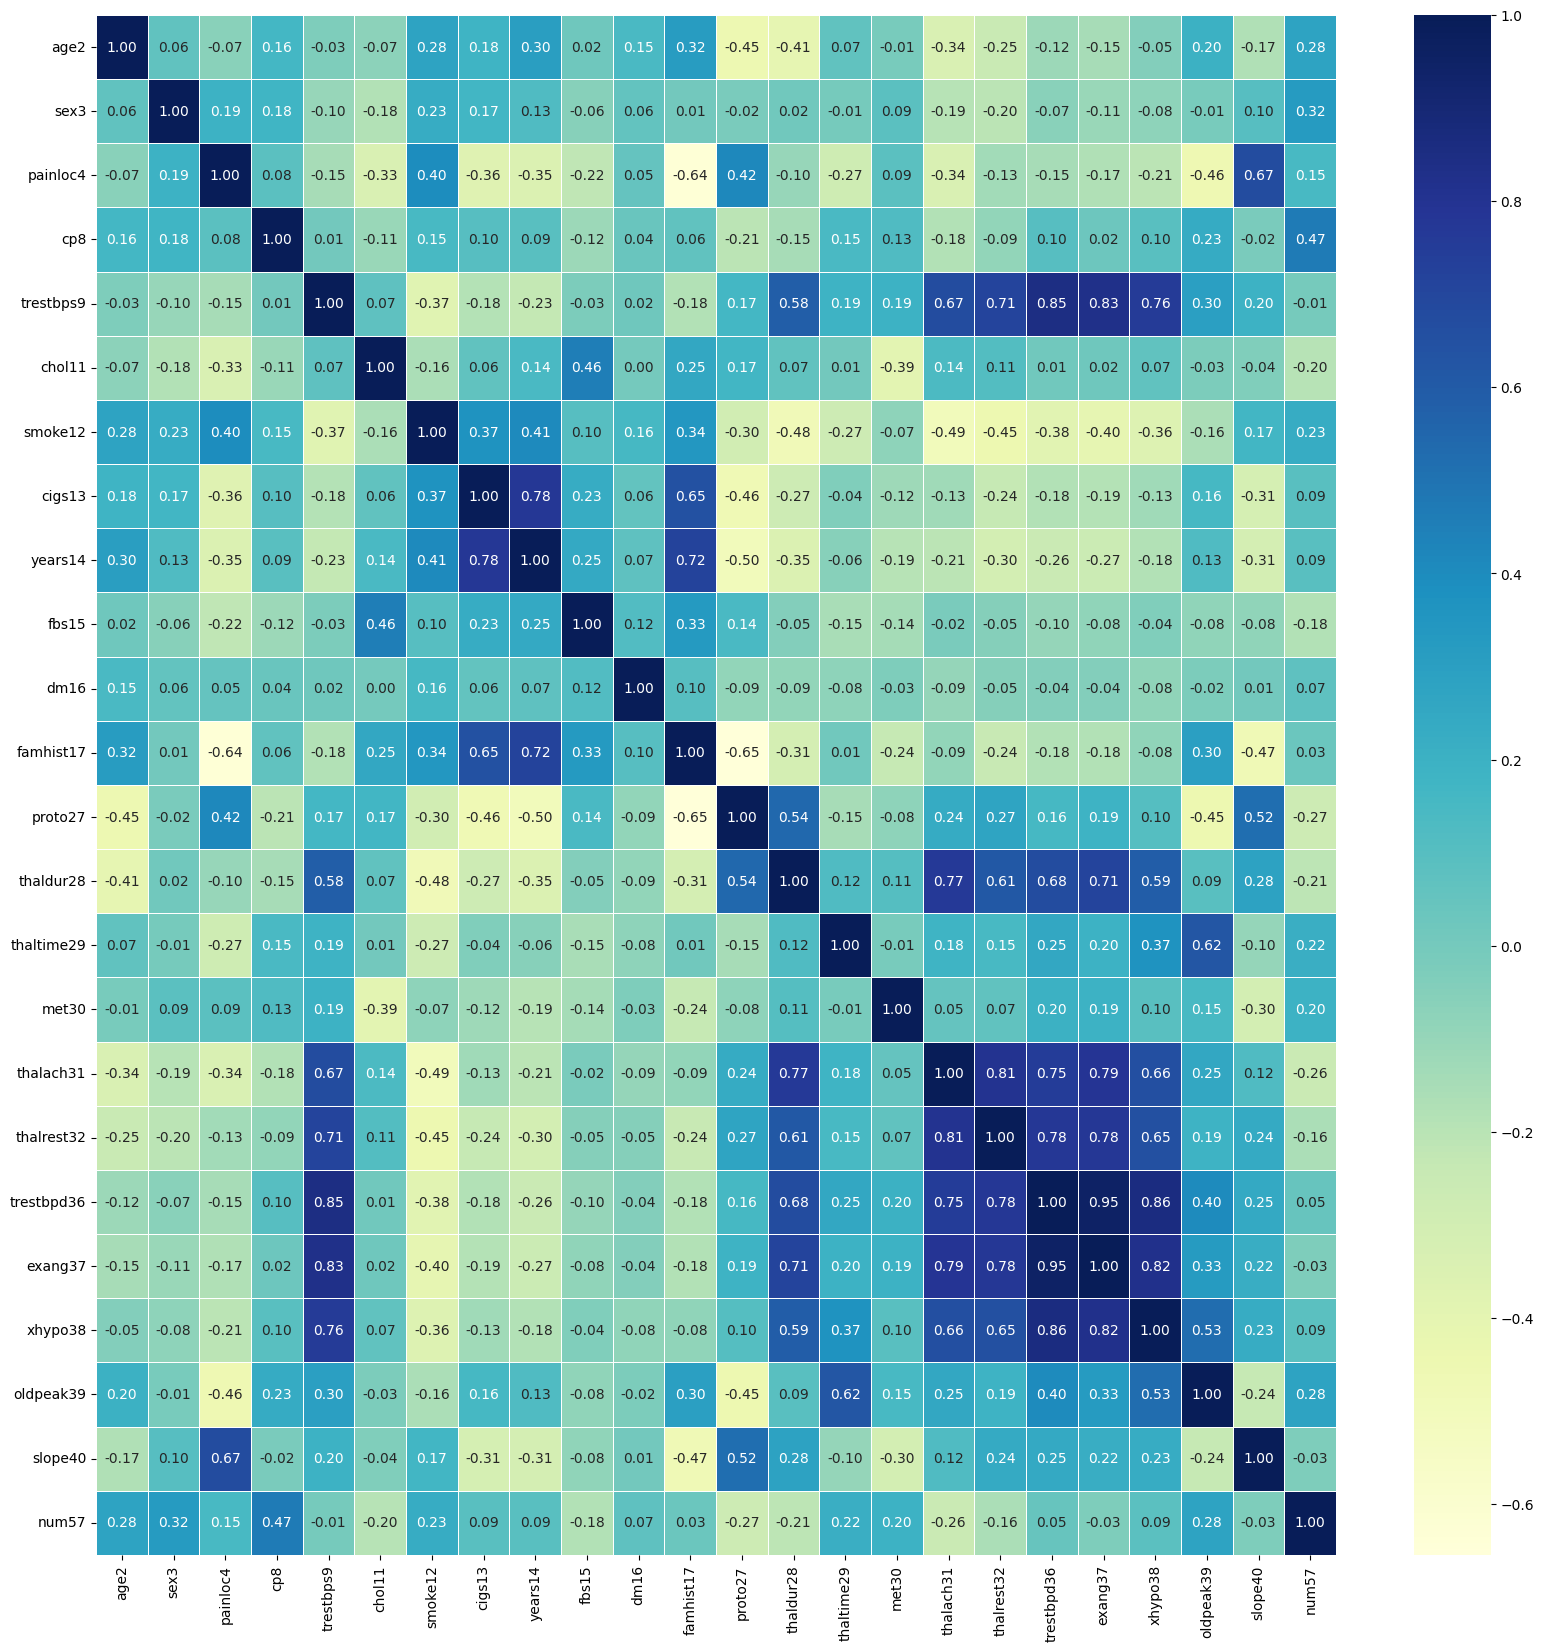

In [ ]:
corr_matrix = selected_fields.corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,fmt=".2f",
                cmap="YlGnBu")

Finding Patterns

In [ ]:
# Compare target with sex column

crosstab_result = pd.crosstab(selected_fields.num57,selected_fields.sex3)

In [ ]:
# Compare target with sex column

crosstab_result1 = pd.crosstab(selected_fields.num57,selected_fields.fbs15)

crosstab_result2 = pd.crosstab(selected_fields.num57,selected_fields.chol11)

# Rename 0=Female; 1= Male for better reading
crosstab_result = crosstab_result.rename(columns={0: 'Female', 1:'Male'})

crosstab_result = crosstab_result.rename_axis('prediction')
# Rename values in the index
crosstab_result = crosstab_result.rename({0: 'No Disease', 1: 'Disease'})

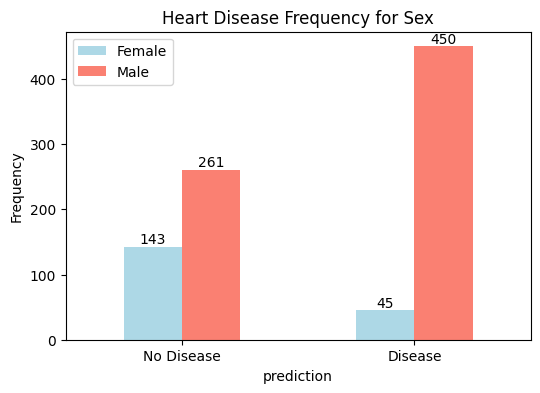

In [ ]:
# create a bar plot
# The males are more likely to be affected by this disease than females.

ax = crosstab_result.plot(kind="bar", figsize=(6,4), color=["lightblue", "salmon"])
ax.legend(['Female', 'Male'])

# Add titles and labels
plt.title("Heart Disease Frequency for Sex")
#plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

# Annotate the bars with actual numbers
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

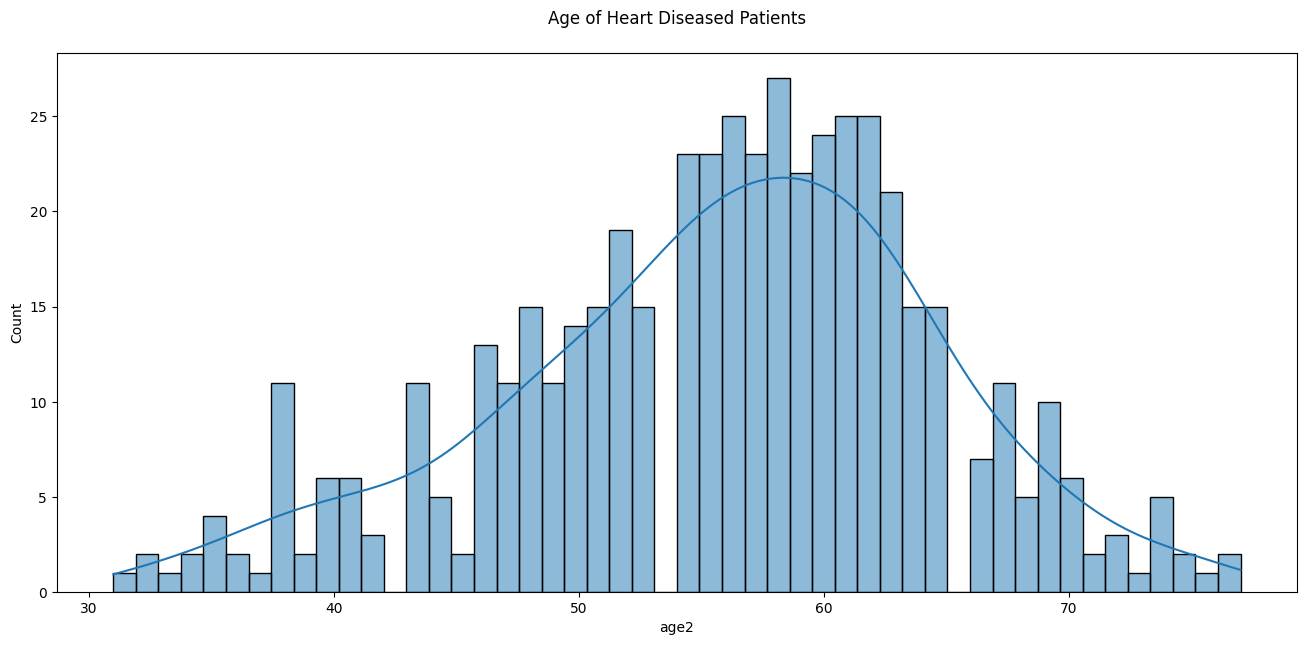

In [ ]:
# A histogram of the age for heart diseased patients.
# kde is the kernel density estimate plot to provide a smoothed estimate of the datas probability density function
# bins = 50 : The age is divided into 50 equally spaced intervals, and the histogram will display the frequency of
# data points in each of these intervals
# The histogram shows a normal distribution curve, with maximum between 55 and 65 year olds

plt.figure(figsize=(16,7))
sns.histplot(selected_fields[selected_fields['num57']==1]['age2'],kde=True,bins=50)
plt.title('Age of Heart Diseased Patients\n')

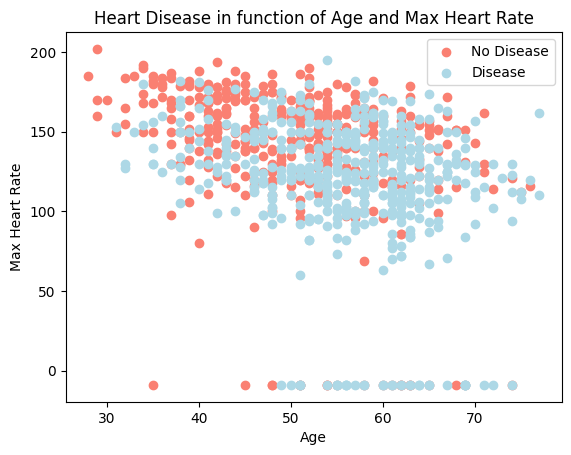

In [ ]:
# A scatter plot to compare Age vs max Heart Rate(thalch) for the target
# The observation we can see that the diseased patients were not at maximum heart rate zone.
# As the patient got older, the maximum heart reduced, indicating the patient is slightly prone to heart disease

plt.scatter(selected_fields.age2[selected_fields.num57==0],selected_fields.thalach31[selected_fields.num57==0],c="salmon")
plt.scatter(selected_fields.age2[selected_fields.num57==1],selected_fields.thalach31[selected_fields.num57==1],c="lightblue")


# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel("Age")
plt.ylabel('Max Heart Rate')
plt.legend(['No Disease', 'Disease'])